<a href="https://colab.research.google.com/github/benjarojas/ADA-Informes/blob/main/QuickSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de Ordenamiento
**Entrada**: Conjunto de n elementos $[ a_1, a_2, \ldots, a_n ]$

**Salida**: Permutación de los elementos de entrada $ [ a_1', a_2', \ldots, a_n' ] $ de forma que $ a_1' \leq a_2' \leq \ldots \leq a_n' $

El ordenamiento es un problema estudiado desde los inicios de las ciencias de la computación puesto que a pesar de existir muchos algoritmos que lo resuelvan, cada uno de estos presenta ventajas y desventajas según sea el caso donde se aplique. En este informe se estudiará el algoritmo ***QuickSort***, que es uno de los mas populares y  utilizados por los programadores.

# 2. Función Partition
Esta función es la base de este algoritmo.
Se elige un elemento pivote dentro del arreglo y se re-ordenarán sus elementos de tal forma que los elementos que se encuentren a la izquierda sean menores y a la derecha mayores.

## 2.1 Partition con pivote en el último elemento

In [3]:
k = 0
def partition_last(A, low, high):
  global k # contador de comparaciones
  pivot = A[high]
  i = low - 1
  for j in range(low,high): # recorremos todos los índices del (sub) arreglo
    k = k + 1 # sumamos 1 comparación
    # si el elemento A[j] es menor al pivote
    if(A[j]<pivot):
      i += 1
      A[i], A[j] = A[j], A[i] # se intercambia
  k = k + 1 # +1 comparación
  A[i+1], A[high] = A[high], A[i+1]
  return (i+1) # retornamos el nuevo índice del pivote

## 2.2 Partition con pivote en el primer elemento

In [4]:
k = 0
def partition_first(A, l, h):
  low, high = l, h
  global k
  if l != h and l < h:
    k = k + 1 # primera comparacion
    pivot = A[l]
    low += 1
    while low <= high:
      k = k + 1 # +1 comparación
      if A[high] < pivot and A[low] > pivot:
        A[high], A[low] = A[low], A[high]
      k = k + 1 # +1 comparación
      if not A[low] > pivot:
        low += 1
      k = k + 1 # +1 comparación
      if not A[high] < pivot:
        high -= 1
  A[l], A[high] = A[high], A[l]
  return high

## 2.3 Partition con pivote en la mediana de 3 elementos aleatorios

In [5]:
import random
import statistics
k = 0
# calculamos la mediana de una lista de 3 elementos aleatorios
# y lo intercambiamos a la primera posición, luego particionamos
def partition_rng(A, l, h):
  global k # contador de comparaciones
  randElements = list([A[random.randint(l, h)], A[random.randint(l, h)], A[random.randint(l, h)]])
  m = statistics.median(randElements)
  pivot_index = A.index(m)
  A[l], A[pivot_index] = A[pivot_index], A[l]
  pivot = A[l]
  i = l
  for j in range(l+1, h+1):
    k+=1 # sumamos comparacion
    if(A[j] < pivot):
      i+=1
      A[i], A[j] = A[j], A[i]
  k = k + 1 # +1 comparación
  A[i], A[l] = A[l], A[i]
  return i

## 2.4 Descripción de Partition
El algoritmo Partition es una parte fundamental de QuickSort, este se encarga de tomar un elemento pivote (la elección de este varía según la implementación). Su funcionamiento es bastante simple, por ejemplo, en `partition_first` el algoritmo sigue los siguientes pasos:


*   Tomamos como pivote el primer elemento del arreglo
*   Recorremos el arreglo.
*   Mantenemos un índice $i$ que corresponde al índice del menor elemento encontrado hasta el momento.
*   Si encontramos un elemento $ \lt A[i]$, lo intercambiamos.
*   Retornamos el índice de la nueva posición del pivote.


# 3. QuickSort

## 3.1 Código

In [39]:
from termcolor import colored

def QuickSort(A, l, h, verbose=False, partition=1):
  # caso base
  if l == h:
    if(verbose): print(f"Caso base. Sub-arreglo ordenado: {A[l:h+1]}\n")
    return A
  
  # sub-arreglo valido
  if(l < h):
    if(verbose): print(f"Sub-arreglo: {A[l:h+1]}")

    # se puede elegir el algoritmo de particion a utilizar
    # por defecto se utiliza partition_last()
    if(partition==1):
      pivot_index = partition_last(A, l, h)
      if(verbose): print(f"Particionamos con pivote en el ultimo elemento: [{colored(str(A[h]), 'green')}]")
    if(partition==2):
      pivot_index = partition_first(A, l, h)
      if(verbose): print(f"Particionamos con pivote en el primer elemento: [{colored(str(A[l]), 'green')}]")
    if(partition==3):
      pivot_index = partition_rng(A, l, h)
      if(verbose): print(f"Particionamos con un pivote aleatorio: [{colored(str(A[pivot_index]), 'green')}]")

    if(verbose):
      print(f"Sub-arreglo particionado: {A[l:h+1]}\n")
      print(f"Descartamos el pivote [{colored(str(A[pivot_index]), 'green')}]")
      print(f"Dividimos en {colored(str(A[l:pivot_index]), 'magenta')} y {colored(str(A[pivot_index+1:h+1]), 'blue')}\n")

    # llamamos recursivamente para ordenar desde low hasta pivote-1
    QuickSort(A, l, pivot_index-1, verbose=verbose, partition=partition)
    # llamamos recursivamente para ordenar desde pivote-1 hasta high
    QuickSort(A, pivot_index+1, h, verbose=verbose, partition=partition)
  return A

## 3.2 Descripción de QuickSort
**QuickSort** se basa en el paradigma de diseño ***Divide y Vencerás***, es decir, sub-divide el problema recursivamente para reducir su complejidad.


*   Primero, el algoritmo usa la función **Partition**, que dependiendo de la implementación, elegirá un elemento **pivote** y ubicará todos los elementos menores del arreglo a la izquierda y los mayores a la derecha.
*   Una vez particionado el arreglo, llamamos a la función recursivamente con $2$ sub-arreglos que se forman al descartar el pivote, es decir: `quickSort(A, low, pivot - 1)` y `quickSort(A, pivot + 1, high)`.
*   La función seguirá llamandose **recursivamente** hasta llegar al **caso base**, que corresponde a cuando el sub-arreglo tiene tamaño $1$, y se retorna el mismo arreglo.

## 3.3 Ejemplo de Ejecución

Tomaremos el arreglo $[5, 4, 3, 2, 1]$.

Llamaremos a la función partition, que tomará al elemento $[1]$ como pivote y el arreglo quedará: $[1, 4, 3, 2, 5]$.

Descartamos el pivote $[1]$.

Al dividir nos queda un arreglo vacío y el sub-arreglo $[4, 3, 2, 5]$.

Tomamos el sub-arreglo $[4, 3, 2, 5]$.

Llamaremos a la función partition, que tomará al elemento $[5]$ como pivote y el sub-arreglo quedará: $[4, 3, 2, 5]$.

Descartamos el pivote $[5]$.

Al dividir nos queda un arreglo vacío y el sub-arreglo $[4, 3, 2]$.

Tomamos el sub-arreglo $[4, 3, 2]$.

Llamaremos a la función partition, que tomará al elemento $[2]$ como pivote y el sub-arreglo quedará: $[2, 3, 4]$.

Descartamos el pivote $[2]$.

Al dividir nos queda un arreglo vacío $[]$ y $[3, 4]$.

Tomamos el sub-arreglo $[3, 4]$.

Llamaremos a la función partition, que tomará al elemento $[4]$ como pivote y el sub-arreglo quedará: $[3, 4]$.

Descartamos el pivote $[4]$.

Al dividir nos queda un arreglo vacío $[]$ y $[3]$.

Llegamos al caso base. Sub-arreglo de un elemento: $[3]$.

Se llegó al fin de la pila de llamadas recursivas por lo que se retorna el arreglo ordenado: $[1, 2, 3, 4, 5]$.

## 3.4 Ejecución paso a paso `verbose = True`

In [38]:
# creamos arreglo aleatorio con largo [5, 10] y muestra aleatoria en el intervalo [0, 99]
A, k = random.sample(range(100), random.randint(5,10)), 0
QuickSort(A, 0, len(A) - 1, verbose=True)
print(f"Arreglo ordenado: {A}")
print(f"{k} comparaciones realizadas.")

Sub-arreglo: [53, 99, 24, 55, 67]
Particionamos con pivote en el ultimo elemento: [99]
Sub-arreglo particionado: [53, 24, 55, 67, 99]

Descartamos el pivote [67]
Dividimos en [53, 24, 55] y [99]

Sub-arreglo: [53, 24, 55]
Particionamos con pivote en el ultimo elemento: [55]
Sub-arreglo particionado: [53, 24, 55]

Descartamos el pivote [55]
Dividimos en [53, 24] y []

Sub-arreglo: [53, 24]
Particionamos con pivote en el ultimo elemento: [53]
Sub-arreglo particionado: [24, 53]

Descartamos el pivote [24]
Dividimos en [] y [53]

Caso base. Sub-arreglo ordenado: [53]

Caso base. Sub-arreglo ordenado: [99]

Arreglo ordenado: [24, 53, 55, 67, 99]
10 comparaciones realizadas.


# 4. Tiempo de ejecución
El rendimiento temporal de QuickSort se ve directamente afectado según el arreglo de entrada, por lo que debemos probar 2 cotas asintóticas, para el **mejor** y **peor** caso.


## 4.1 **Teorema 1**
> QuickSort tiene un tiempo de ejecución de orden de complejidad $O(n \log{n})$ para su mejor caso.

## Prueba del **teorema 1**
Para este caso debemos asumir que en cada llamada recursiva **QuickSort** producirá 2 particiones de tamaño $n/2$. Sabemos que el caso base tiene complejidad constante $O(1)$ y que el tiempo de ejecución de ***partition*** es de orden $O(n)$, por lo que definiremos la función de recurrencia como:


$ T(n) = \begin{cases} 
      O(1) & n=1 \\
      2T(n/2) + O(n) & n>1\\
   \end{cases} $


  Ahora que tenemos la función de recurrencia del algoritmo, podemos aplicar el **Teorema Maestro** para resolverla y así obtener una cota asintótica, ya que esta función cumple con la condición de ser de la forma: $T(n) \leq aT(n/b) + O(n^d)$.

Para aplicar este teorema, primero debemos identificar los parámetros $a, b$ y $d$ en nuestra función:

$T(n) = \color{red}{2}T(n/\color{red}{2}) + O(n^{\color{red}{1}})$


Observando la función es fácil darse cuenta que estos corresponden a: $a = 2, b = 2 \ \text{y} \ d = 1$.

Ahora que tenemos los parámetros, debemos fijarnos en el teorema y ver el caso al que corresponde nuestra recurrencia:


$ T(n) = \begin{cases} 
      O(n^d \log{n}) & \text{si } \color{red}{a = b^d \text{ [caso 1]}} \\
      O(n^d) & \text{si } a < b^d \text{ [caso 2]} \\
      O(n^{\log_b{a}}) & \text{si } a > b^d \text{ [caso 3]} 
   \end{cases}
$


Como podemos ver, la función **cumple con el caso 1 del teorema maestro**, por lo que reemplazamos los parámetros y obtenemos que el **tiempo de ejecución del mejor caso de QuickSort tiene orden de complejidad** $O(n \log{n})$. $\blacksquare$

## 4.2 **Teorema 2**
> QuickSort tiene un tiempo de ejecución de orden $O(n^2)$ para su peor caso.

## Prueba del **teorema 2**
Para este caso debemos asumir que en cada llamada recursiva producirá una **partición de tamaño $n-1$**, y que la otra tendrá tamaño $0$. Sabemos que el caso base tiene complejidad constante $O(1)$ y que el tiempo de ejecución de ***Partition*** es de orden $O(n)$, por lo que definiremos la función de recurrencia como:

$ T(n) = \begin{cases} 
      O(1) & n=1 \\
      T(n-1) + T(0) + O(n) & n>1\\
   \end{cases} $

Reemplazando por una constante $c$ nuestra función quedaría como:

$T(n) \leq T(n-1) + cn$

Ahora utilizaremos **sustitución** para probar el tiempo de ejecución para el peor caso. **Reemplazamos $n-1$ en nuestra ecuación** y despejamos:

$T(n) \leq c(n-1)^2 + cn$

$T(n) \leq c(n^2 - 2n + 1) + cn$

$T(n) \leq cn^2 - 2cn + c + cn$

$T(n) \leq cn^2 - cn + c$

Y ahora que resolvimos nuestra recurrencia, para expresar el tiempo de ejecución en notación asintótica **tomamos el término de mayor grado del polinomio y removemos las constantes**, con lo que obtenemos que el **peor caso de QuickSort tiene orden de complejidad** $O(n^2)$. $\blacksquare$

# 5. Correctitud

Para probar que el algoritmo **QuickSort** es correcto, primero debemos probar la correctitud de **Partition**.

## 5.1 **Teorema: Correctitud de Partition**

> *La función **Partition** toma un arreglo $A[l \ldots h]$ y retorna un índice $q$. **Partition** reorganiza el arreglo de forma que los elementos $A[l \ldots {q-1}]$ son $\leq A[q]$ y los elementos $A[{q-1} \ldots h]$ son $\geq A[q]$.*

## Prueba del **teorema**

Durante la ejecución del algoritmo existirán $4$ regiones:


1.   $A[l \ldots i]$ donde todos los elementos son $\leq A[q]$ ($q$ es el índice del pivote).
2.   $A[i+1 \ldots j-1]$ donde todos los elementos son $> A[q]$ ($q$ es el índice del pivote).
3.   $A[j \ldots q-1]$ que son los elementos sin procesar por el algoritmo ($q$ es el índice del pivote).
4.   $A[q]$ que es la región donde se encuentra únicamente el pivote ($q$ es el índice del pivote).

Para probar la correctitud de **Partition** utilizaremos la siguiente **propiedad invariante de bucle:**

> Al comienzo de cada iteración, se cumple que $\forall$ índice ${k}$:

*   Si $p \leq k \leq i$, entonces $A[k] \leq A[q]$
*   Si $i < k < j$, entonces $A[k] > A[q]$

**Inicialización:** Al comienzo de la primera iteración se tiene que los arreglos $A[q, \ldots, i]$ y $A[i, \ldots, j]$ se encuentran vacíos, ya que $i = -1$ y $j = 0$, por lo que se cumple la propiedad.

**Mantención:**
En las siguientes iteraciones del bucle, se tienen dos casos:

*    $A[j] <= A[q]$
*    $A[j] > A[q]$

En el primer caso $A[j]$ es menor o igual al elemento pivote, por lo que intercambiamos $A[j]$ y $A[i]$ e incrementamos $i$ en $1$. Ya que se realizó el intercambio $A[i]$ es menor al pivote, por lo que se cumple la segunda condición de la **propiedad invariante de bucle**.

En el segundo caso, el elemento $A[j]$ $>$ $A[q]$, es decir, mayor al pivote, por lo que no se realiza ningún intercambio y pasamos a la siguiente iteración, y ahora el elemento $A[j-1]$ cumple con la primera condición **propiedad invariante de bucle**.

Ya que probamos que la **propiedad invariante de bucle** se cumple al inicio del bucle y se **mantiene en cada iteración**, queda demostrado que **Partition es correcto.** $\blacksquare$


## 5.2 **Hipótesis: Correctitud de QuickSort**

> *Nuestra hipótesis $P(n)$ es que **QuickSort** recibe como entrada un arreglo $[a_1, a_2, \ldots, a_n]$ y lo ordena de forma que $a_1 \leq a_2 \leq \ldots \leq a_n$ donde $n$ es el tamaño del problema.*

## Prueba de la **hipótesis**

Para probar la correctitud de **QuickSort** utilizaremos ***inducción matemática***.

**Caso Base:** El caso base del algoritmo corresponde a un arreglo de tamaño $1$ $(n = 1)$. Se cumple la propiedad ya que un arreglo con un único elemento se encuentra **trivialmente ordenado** ($P(1)$ es correcto).

**Paso Inductivo:** Primero asumiremos que **QuickSort** es correcto para un problema $P(n)$.

Tomaremos un arreglo de tamaño $m$, donde $m = 2n$.

Asumiremos que el algoritmo particionará el arreglo y se generarán 2 sub-arreglos $\lfloor m/2 \rfloor$ y $\lceil m/2. \rceil$. Sabemos que $m = 2n$, por lo que los sub-arreglos tendrán tamaño $n$.

Por **hipótesis inductiva** sabemos que **QuickSort** es correcto para $P(n)$ y **partition** es correcto, por lo que **queda demostrado que QuickSort es correcto**. $\blacksquare$

# 6. Experimentos

## 6.1 Cantidad de comparaciones experimental v/s teórica

A continuación se comparará gráficamente la cantidad total de comparaciones que realiza el algoritmo para arreglos generados aleatoriamente.

Se crearan arreglos aleatorios con tamaño $n \in [5, \ldots, 100]$ y elementos aleatorios en el intervalo $[1,\ldots,100]$.

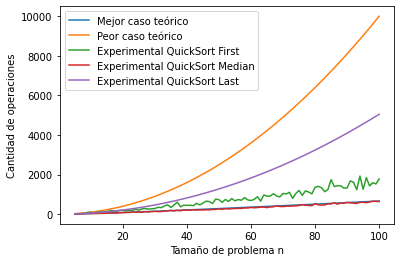

In [53]:
import matplotlib.pyplot as plt
from math import log2
import random

x=[]; y1=[]; y2=[]; y3=[]; y4=[]; y5=[]

for n in range(5, 101):
  k = 0

  # Problem Size n
  x.append(n)

  # QuickSort Theoretical Best
  y1.append(n*log2(n))

  # Random Array
  A = random.sample(range(101), n)
  B, C = A, A

  # QuickSort Theoretical Worst
  y2.append(n**2)

  # QuickSort First
  QuickSort(A, 0, len(A)-1, partition=2)
  y3.append(k)

  # QuickSort Median
  k=0
  QuickSort(B, 0, len(B)-1, partition=3)
  y4.append(k)

  # QuickSort Last
  k=0
  QuickSort(C, 0, len(C)-1)
  y5.append(k)

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.plot(x,y5)
plt.legend(["Mejor caso teórico", "Peor caso teórico", "Experimental QuickSort First", "Experimental QuickSort Median", "Experimental QuickSort Last"])

plt.xlabel("Tamaño de problema n")
plt.ylabel("Cantidad de operaciones")
plt.show()

### 6.1.1 Análisis de Resultados
En el gráfico se puede observar como el criterio de elección del pivote de **Partition** puede afectar a la cantidad de comparaciones totales que debe realizar **QuickSort**. Se puede apreciar que el criterio que menos comparaciones realiza es el de **pivote calculado a partir de la mediana de 3 elementos aleatorios** que se superpone casi en su totalidad al mejor caso teórico, y que el que mas comparaciones realiza es el **pivote en el último elemento del arreglo**, mientras que el **pivote en el primer elemento** se mantiene entre los 2 anteriormente mencionados.

A partir de la imagen podemos concluir que a pesar de que la **elección del pivote influya en la cantidad de comparaciones** que debe realizar el algoritmo, **este sigue siendo muy eficiente** puesto que **ninguno de los casos experimentales se acerca considerablemente al peor caso teórico** en tamaños de problema grandes.

## 6.2 Comparación MergeSort v/s QuickSort

A continuación se comparará el tiempo de ejecución de los algoritmos QuickSort y MergeSort.

Se utilizará un tamaño de problema $n \in [5, \ldots, 1000]$ con una muestra de elementos aleatorios en el intervalo $[1,\ldots,1000]$.

In [24]:
def merge_sort(list):
    list_length = len(list)
    if list_length == 1:
        return list
    mid_point = list_length // 2
    left_partition = merge_sort(list[:mid_point])
    right_partition = merge_sort(list[mid_point:])
    return merge(left_partition, right_partition)
def merge(left, right):
    output = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            output.append(left[i])
            i += 1
        else:
            output.append(right[j])
            j += 1
    output.extend(left[i:])
    output.extend(right[j:])
    return output

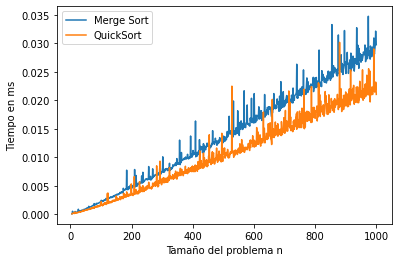

In [52]:
import datetime
import random
from timeit import repeat

x=[]; y1=[]; y2=[];

for n in range(5,1001):

    A = random.sample(range(1, 1001), n)
    B = A

    # repeat() ejecuta 10 veces los algoritmos con el mismo arreglo aleatorio A y retorna el mejor tiempo obtenido
    t_merge = repeat(setup="from __main__ import merge_sort", stmt=f"merge_sort({B})", repeat=1, number=10)
    t_quick = repeat(setup="from __main__ import QuickSort", stmt=f"QuickSort({A},0,{len(A)-1})", repeat=1, number=10)
    x.append(n)
    y1.append(t_merge)
    y2.append(t_quick)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Merge Sort", "QuickSort"])

plt.xlabel('Tamaño del problema n')
plt.ylabel('Tiempo en ms')
plt.show()

### 6.2.1 Análisis de Resultados

Como se puede apreciar en el gráfico, ambos algoritmos son bastante eficientes temporalmente hablando, pero **QuickSort** tiene una ventaja considerable especialmente para tamaños de problema grandes.

También se pueden apreciar ciertos peaks en la imagen, nuestra suposición inicial es que esto se debía a que la entrada aleatoria en ocasiones se parecía al peor caso de **QuickSort** (arreglo total/parcialmente ordenado) y esto causaba este aumento inesperado en el tiempo de ejecución, pero estos peaks también se pueden apreciar en la curva de **MergeSort**, que tiene la misma complejidad para todos sus casos, por lo que concluímos que estos peaks se deben al comportamiento impredecible del procesador.

## 6.3 Comparación de la cantidad de operaciones de las implementaciones de Partition para el peor caso

A continuación se comparará la cantidad de comparaciones que realiza el algoritmo utilizando las 3 implementaciones de **Partition** para el peor caso *(arreglos ordenados)*. Los criterios a utilizar son:

1.   Pivote en el **último elemento**
2.   Pivote en el **primer elemento**
3.   Pivote calculado a partir de la **mediana de 3 elementos aleatorios**

Se utilizará un tamaño de problema $n \in [5 \ldots 500]$ con una muestra de elementos **ordenados** en el intervalo $[1,\ldots,500]$.



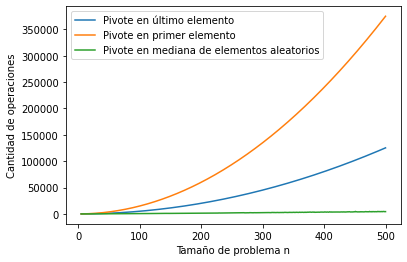

In [55]:
import matplotlib.pyplot as plt
import random

x=[]; y1=[]; y2=[]; y3=[]

for n in range(5, 501):
  x.append(n)
  
  # Arreglo aleatorio A y copias
  A = list(range(n))
  B = A
  C = A

  # Último elemento como pivote
  k = 0
  QuickSort(A, 0, len(A)-1, partition=1)
  y1.append(k)

  # Primer elemento como pivote
  k = 0
  QuickSort(B, 0, len(B)-1, partition=2)
  y2.append(k)

  # Pivote aleatorio
  k = 0
  QuickSort(C, 0, len(C)-1, partition=3)
  y3.append(k)

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.legend(["Pivote en último elemento", "Pivote en primer elemento", "Pivote en mediana de elementos aleatorios"])

plt.xlabel("Tamaño de problema n")
plt.ylabel("Cantidad de operaciones")
plt.show()

### 6.3.1 Análisis de Resultados
En el gráfico nos podemos dar cuenta de que el **utilizar siempre un pivote en un extremo** (inicio o final del arreglo) **causa que la cantidad de operaciones crezca exponencialmente cuando el arreglo de entrada está ordenado** (peor caso), mientras que el **pivote en la mediana de 3 elementos aleatorios se mantiene estable/crece de forma muy lenta**, por lo que este criterio **haría mucho mas eficiente el algoritmo en cuanto al número de comparaciones para su peor caso.**

## 6.4 Tiempo de ejecución de las implementaciones de Partition para casos aleatorios

En el siguiente experimento se comparará cuanto tarda **QuickSort** en ordenar **arreglos aleatorios** utilizando las 3 implementaciones de **Partition**.

Se utilizará un tamaño de problema $n \in [5 \ldots 500]$ con una muestra de números aleatorios en el intervalo $[1,\ldots,500]$.

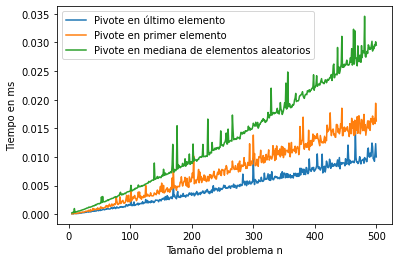

In [56]:
import datetime
import random
from timeit import repeat

x=[]; y1=[]; y2=[]; y3=[]

for n in range(5,501):

    # A y copias
    A = random.sample(range(1, 501), n)
    B = A
    C = A

    # repeat() ejecuta 10 veces los algoritmos con el arreglo aleatorio y retorna el mejor tiempo obtenido
    t_quick = repeat(setup="from __main__ import QuickSort", stmt=f"QuickSort({A},0,{len(A)-1},partition=1)", repeat=1, number=10)
    t_quick1 = repeat(setup="from __main__ import QuickSort", stmt=f"QuickSort({B},0,{len(B)-1},partition=2)", repeat=1, number=10)
    t_quick2 = repeat(setup="from __main__ import QuickSort", stmt=f"QuickSort({C},0,{len(C)-1},partition=3)", repeat=1, number=10)
    x.append(n)
    y1.append(t_quick)
    y2.append(t_quick1)
    y3.append(t_quick2)

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.legend(["Pivote en último elemento", "Pivote en primer elemento", "Pivote en mediana de elementos aleatorios"])

plt.xlabel('Tamaño del problema n')
plt.ylabel('Tiempo en ms')
plt.show()

### 6.4.1 Análisis de resultados

Como se puede apreciar en el gráfico, a pesar de realizar menor número de comparaciones, el utilizar el algoritmo **QuickSort** con el método de particionar en base a un **pivote calculado de la mediana de 3 elementos aleatorios** es el que peor rinde temporalmente. Esto creemos que se puede deber a la cantidad de tiempo extra que toma calcular la mediana de esos 3 elementos aleatorios, ya que de no ser así, **debería ser mas rápido que los otros métodos** implementados pues **realiza muchas menos operaciones incluso en el peor caso**.